In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('final_data.csv')
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)
X_train = train_set.drop(['Accident'], axis=1)
Y_train = train_set['Accident']
X_test = test_set.drop(['Accident'], axis=1)
Y_test = test_set['Accident']
Y = data['Accident']
X = data.drop(['Accident'], axis = 1)

In [3]:
Y_train.value_counts()

0    2805
1     676
Name: Accident, dtype: int64

In [4]:
Y_test.value_counts()

0    694
1    177
Name: Accident, dtype: int64

In [5]:
import math
import operator
def euclideaDistance(in1, in2, length1, length2):
    distance = 0
    for i in (length1, length2):
        distance += pow((in1[i] - in2[i]),2)
    return math.sqrt(distance)

In [6]:
data.iloc[1]

Unnamed: 0       1.000000
LONGITUDE     -121.791060
LATITUDE        37.225223
SPD             25.000000
LEN           3362.000000
ACC              4.000000
VOL           2550.000000
F85th           29.000000
LOCAL            0.000000
F50th           26.000000
Precip           0.070000
Air max         67.000000
min             47.000000
obs             57.000000
hour             7.000000
Accident         0.000000
Name: 1, dtype: float64

In [7]:
len(data.iloc[1])

16

In [13]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print("Accuracy={:.4f}".format(accuracy_score(Y_test, Y_pred)))

[[687   7]
 [171   6]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.89       694
           1       0.46      0.03      0.06       177

   micro avg       0.80      0.80      0.80       871
   macro avg       0.63      0.51      0.47       871
weighted avg       0.73      0.80      0.72       871

Accuracy=0.7956


In [21]:
from sklearn.model_selection import cross_val_score

In [31]:
k = []
accuracy = []
for i in range(1, 50, 2):
    k.append(i)
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)    
    accuracy.append(accuracy_score(Y_test, Y_pred))


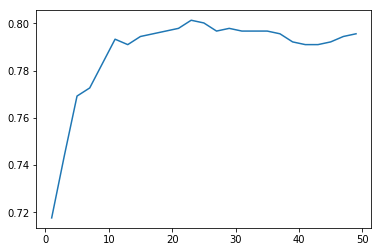

In [32]:
plt.plot(k, accuracy)
plt.show()

In [17]:
max(accuracy)

0.801377726750861

In [19]:
k[pd.Series(accuracy).idxmax()]

23

In [38]:
k = []
accuracy = []
for i in range(1, 100, 2):
    k.append(i)
    classifier = KNeighborsClassifier(n_neighbors=i) 
    scores = cross_val_score(classifier, X, Y, cv=5, scoring='accuracy')
    accuracy.append(scores.mean())


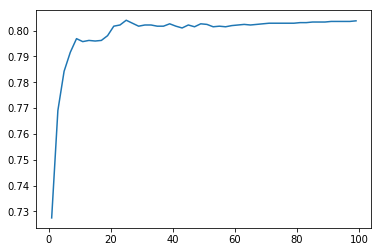

In [39]:
plt.plot(k, accuracy)
plt.show()

In [40]:
max(accuracy)

0.8039987354330957

In [41]:
k[pd.Series(accuracy).idxmax()]

25